<a href="https://colab.research.google.com/github/Sawnann/colab-test/blob/main/CNN_LSTM_Test2_ipynb%20(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

reference code: https://www.kaggle.com/code/anitarostami/lstm-multivariate-forecasting

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Dropout, BatchNormalization, Conv1D, Flatten
from sklearn.metrics import mean_squared_error as mse
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
from pandas import DatetimeIndex

In [ ]:
df_train = pd.read_csv('model2_data_train.csv')
df_train

,Date,co2,gdp,elec,renewanbleenergy,population,cpi,ipi,eport_amt,commericalvehicle,vehiclecount
0,2004/1/1,19.69,933906.28,15020,461168,22541,82.32,40.70,421740,3546335,5203918
1,2004/2/1,19.75,935798.33,14530,553953,22546,81.69,43.37,463788,3551410,5216924
2,2004/3/1,19.80,937690.39,16624,598110,22551,81.63,47.90,518080,3902882,5232036
3,2004/4/1,19.86,927492.46,16327,518228,22556,82.57,46.43,490401,1130069,5247496
4,2004/5/1,19.91,941486.00,17047,577714,22562,82.49,47.29,551494,3899401,5261119
...,...,...,...,...,...,...,...,...,...,...,...
166,2017/11/1,22.38,1571847.00,22474,984943,23415,97.50,79.89,863180,3278243,6755022
167,2017/12/1,22.37,1547388.13,20842,1023672,23419,97.35,81.46,881044,3353728,6763422
168,2018/1/1,22.59,1501386.81,20687,1175567,23421,97.02,79.31,808897,3358140,6776083
169,2018/2/1,22.53,1499594.67,18073,1110499,23421,97.93,63.76,647843,2855660,6779466


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               171 non-null    object 
 1   co2                171 non-null    float64
 2   gdp                171 non-null    float64
 3   elec               171 non-null    int64  
 4   renewanbleenergy   171 non-null    int64  
 5   population         171 non-null    int64  
 6   cpi                171 non-null    float64
 7   ipi                171 non-null    float64
 8   eport_amt          171 non-null    int64  
 9   commericalvehicle  171 non-null    int64  
 10  vehiclecount       171 non-null    int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 14.8+ KB


In [ ]:
df_test = pd.read_csv("model2_data_test.csv")
df_test

,co2,gdp,elec,renewanbleenergy,population,cpi,ipi,eport_amt,commericalvehicle,vehiclecount
0,22.42,1481521.59,20920,841121,23421,97.61,75.35,775280,3178918,6786324
1,22.36,1494224.67,22777,898675,23421,97.48,81.98,860859,3360903,6793140
2,22.30,1506927.75,22868,947970,23422,97.88,78.81,840814,3218312,6804823
3,22.24,1511015.19,24637,1054322,23425,98.22,80.02,860424,3293237,6815272
4,22.18,1532660.67,24914,1052057,23426,98.16,82.51,860893,3277993,6814537
5,22.12,1554306.15,24444,1277529,23426,98.32,81.11,906762,3198729,6820976
6,22.06,1622754.60,23385,1255255,23427,98.39,84.60,906308,3354676,6827292
7,22.00,1598527.33,21949,989363,23431,97.78,81.40,854329,3285824,6836595
8,21.94,1574300.07,20776,1041007,23435,97.29,79.85,875183,3342887,6845711
9,21.62,1523147.84,20847,1025434,23437,97.19,79.78,835722,3325718,6853707


In [ ]:
df_train.describe()

,co2,gdp,elec,renewanbleenergy,population,cpi,ipi,eport_amt,commericalvehicle,vehiclecount
count,171.000000,1.710000e+02,171.000000,1.710000e+02,171.000000,171.000000,171.000000,171.000000,1.710000e+02,1.710000e+02
mean,21.163567,1.211845e+06,19776.333333,7.847403e+05,23042.093567,90.695088,60.895029,694426.532164,3.424213e+06,5.984350e+06
std,0.747451,1.750322e+05,2217.349929,2.000187e+05,263.149974,4.406518,11.383913,113496.034621,3.371025e+05,4.291320e+05
min,19.070000,9.274925e+05,13764.000000,4.409850e+05,22541.000000,81.630000,32.180000,389580.000000,1.130069e+06,5.203918e+06
25%,20.825000,1.073458e+06,18372.000000,6.413470e+05,22826.500000,86.795000,50.670000,621860.000000,3.254310e+06,5.680490e+06
50%,21.230000,1.189670e+06,19750.000000,7.507880e+05,23057.000000,91.040000,62.060000,731672.000000,3.380526e+06,5.839984e+06
75%,21.540000,1.375442e+06,21353.500000,8.837315e+05,23269.500000,94.520000,69.600000,777220.000000,3.686530e+06,6.350574e+06
max,22.590000,1.596306e+06,24380.000000,1.593690e+06,23421.000000,97.930000,83.860000,881044.000000,4.181669e+06,6.784083e+06


In [ ]:
df_train_scaled = df_train.copy()
df_test_scaled = df_test.copy()

df_train_scaled['Date'] = pd.to_datetime(df_train_scaled['Date'])
# Resetting the index
df_train_scaled.set_index('Date', inplace=True)
df_train_scaled.head()

,co2,gdp,elec,renewanbleenergy,population,cpi,ipi,eport_amt,commericalvehicle,vehiclecount
Date,,,,,,,,,,
2004-01-01,19.69,933906.28,15020,461168,22541,82.32,40.70,421740,3546335,5203918
2004-02-01,19.75,935798.33,14530,553953,22546,81.69,43.37,463788,3551410,5216924
2004-03-01,19.80,937690.39,16624,598110,22551,81.63,47.90,518080,3902882,5232036
2004-04-01,19.86,927492.46,16327,518228,22556,82.57,46.43,490401,1130069,5247496
2004-05-01,19.91,941486.00,17047,577714,22562,82.49,47.29,551494,3899401,5261119


In [ ]:
df_test_scaled.head (5)

,co2,gdp,elec,renewanbleenergy,population,cpi,ipi,eport_amt,commericalvehicle,vehiclecount
0,22.42,1481521.59,20920,841121,23421,97.61,75.35,775280,3178918,6786324
1,22.36,1494224.67,22777,898675,23421,97.48,81.98,860859,3360903,6793140
2,22.30,1506927.75,22868,947970,23422,97.88,78.81,840814,3218312,6804823
3,22.24,1511015.19,24637,1054322,23425,98.22,80.02,860424,3293237,6815272
4,22.18,1532660.67,24914,1052057,23426,98.16,82.51,860893,3277993,6814537


In [ ]:
scaler = MinMaxScaler()

# Define the columns to scale
# Define the columns to scale
columns = (['co2', 'gdp', 'elec', 'renewanbleenergy', "population", 'cpi',
       'ipi', 'eport_amt', 'commericalvehicle','vehiclecount'])

df_test_scaled = df_test_scaled[columns]

# Scale the selected columns to the range 0-1
df_train_scaled[columns] = scaler.fit_transform(df_train_scaled[columns])
df_test_scaled[columns] = scaler.transform(df_test_scaled[columns])

# Show the scaled data
df_train_scaled.head()

,co2,gdp,elec,renewanbleenergy,population,cpi,ipi,eport_amt,commericalvehicle,vehiclecount
Date,,,,,,,,,,
2004-01-01,0.176136,0.009590,0.118312,0.017509,0.000000,0.042331,0.164861,0.065437,0.791803,0.000000
2004-02-01,0.193182,0.012419,0.072155,0.098003,0.005682,0.003681,0.216525,0.150994,0.793466,0.008231
2004-03-01,0.207386,0.015248,0.269405,0.136310,0.011364,0.000000,0.304180,0.261464,0.908642,0.017794
2004-04-01,0.224432,0.000000,0.241428,0.067010,0.017045,0.057669,0.275735,0.205144,0.000000,0.027578
2004-05-01,0.238636,0.020923,0.309250,0.118616,0.023864,0.052761,0.292376,0.329452,0.907502,0.036199


In [ ]:
df_test_scaled.head()

,co2,gdp,elec,renewanbleenergy,population,cpi,ipi,eport_amt,commericalvehicle,vehiclecount
0,0.951705,0.828376,0.674077,0.347128,1.000000,0.980368,0.835333,0.784798,0.671402,1.001418
1,0.934659,0.847370,0.849002,0.397057,1.000000,0.972393,0.963622,0.958929,0.731037,1.005732
2,0.917614,0.866363,0.857573,0.439822,1.001136,0.996933,0.902283,0.918143,0.684311,1.013125
3,0.900568,0.872475,1.024209,0.532085,1.004545,1.017791,0.925697,0.958044,0.708864,1.019738
4,0.883523,0.904839,1.050301,0.530120,1.005682,1.014110,0.973878,0.958998,0.703868,1.019273


In [ ]:
df_train_scaled = np.array(df_train_scaled)
df_test_scaled = np.array(df_test_scaled)

X = []
y = []
n_future = 3
n_past = 3

#  Train Sets
for i in range(n_past, len(df_train_scaled) - n_future+1):
    X.append(df_train_scaled[i - n_past:i, 1:df_train_scaled.shape[1]])
    y.append(df_train_scaled[i + n_future - 1:i + n_future, 0])
X_train, y_train = np.array(X), np.array(y)

#  Test Sets

X = []
y = []
for i in range(n_past, len(df_test_scaled) - n_future+1):
    X.append(df_test_scaled[i - n_past:i, 1:df_test_scaled.shape[1]])
    y.append(df_test_scaled[i + n_future - 1:i + n_future, 0])
X_test, y_test = np.array(X), np.array(y)

print('X_train shape : {}   y_train shape : {} \n'
      'X_test shape : {}      y_test shape : {} '.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train shape : (166, 3, 9)   y_train shape : (166, 1) 
X_test shape : (40, 3, 9)      y_test shape : (40, 1) 


#  CNN-LSTM MODEL

In [ ]:
#CNN-LSTM Model

def get_model_cnn_lstm(n_past, n_future):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_past, X_train.shape[2])))
    model.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, activation='relu'))
    model.add(LSTM(32, return_sequences=True, activation='relu'))
    model.add(LSTM(32, return_sequences=False, activation='relu'))
    model.add(Dense(n_future))

    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create an instance of the model
model_cnnlstm = get_model_cnn_lstm(n_past=X_train.shape[1], n_future=y_train.shape[1])

# Print model summary to check the structure
model_cnnlstm.summary()

# Define callbacks to save the best model during training
filepath = 'CNN_LSTM.keras'
checkpoint_cnn_lstm = tf.keras.callbacks.ModelCheckpoint(
    filepath=filepath,
    monitor='val_loss',
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode='min')
callbacks_cnn_lstm = [checkpoint_cnn_lstm]

# Train the model
history = model_cnnlstm.fit(X_train, y_train, epochs=500, batch_size=16, verbose=2,
                            validation_data=(X_test, y_test),
                            shuffle=False, callbacks=callbacks_cnn_lstm)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 64)             1792      
                                                                 
 lstm_13 (LSTM)              (None, 1, 32)             12416     
                                                                 
 lstm_14 (LSTM)              (None, 1, 32)             8320      
                                                                 
 lstm_15 (LSTM)              (None, 32)                8320      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30,881
Trainable params: 30,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
11/11 - 2s - loss: 0.3950 - val_loss: 

Epoch 88/500
11/11 - 0s - loss: 0.0092 - val_loss: 0.1492 - 41ms/epoch - 4ms/step
Epoch 89/500
11/11 - 0s - loss: 0.0089 - val_loss: 0.1466 - 64ms/epoch - 6ms/step
Epoch 90/500
11/11 - 0s - loss: 0.0087 - val_loss: 0.1480 - 54ms/epoch - 5ms/step
Epoch 91/500
11/11 - 0s - loss: 0.0086 - val_loss: 0.1572 - 49ms/epoch - 4ms/step
Epoch 92/500
11/11 - 0s - loss: 0.0085 - val_loss: 0.1599 - 48ms/epoch - 4ms/step
Epoch 93/500
11/11 - 0s - loss: 0.0084 - val_loss: 0.1482 - 44ms/epoch - 4ms/step
Epoch 94/500
11/11 - 0s - loss: 0.0084 - val_loss: 0.1633 - 48ms/epoch - 4ms/step
Epoch 95/500
11/11 - 0s - loss: 0.0084 - val_loss: 0.1591 - 56ms/epoch - 5ms/step
Epoch 96/500
11/11 - 0s - loss: 0.0085 - val_loss: 0.1398 - 32ms/epoch - 3ms/step
Epoch 97/500
11/11 - 0s - loss: 0.0086 - val_loss: 0.1664 - 42ms/epoch - 4ms/step
Epoch 98/500
11/11 - 0s - loss: 0.0086 - val_loss: 0.1483 - 42ms/epoch - 4ms/step
Epoch 99/500
11/11 - 0s - loss: 0.0095 - val_loss: 0.1376 - 58ms/epoch - 5ms/step
Epoch 100/500
11

Epoch 187/500
11/11 - 0s - loss: 0.0060 - val_loss: 0.1357 - 33ms/epoch - 3ms/step
Epoch 188/500
11/11 - 0s - loss: 0.0058 - val_loss: 0.1270 - 33ms/epoch - 3ms/step
Epoch 189/500
11/11 - 0s - loss: 0.0058 - val_loss: 0.1324 - 33ms/epoch - 3ms/step
Epoch 190/500
11/11 - 0s - loss: 0.0057 - val_loss: 0.1294 - 42ms/epoch - 4ms/step
Epoch 191/500
11/11 - 0s - loss: 0.0056 - val_loss: 0.1269 - 43ms/epoch - 4ms/step
Epoch 192/500
11/11 - 0s - loss: 0.0057 - val_loss: 0.1324 - 40ms/epoch - 4ms/step
Epoch 193/500
11/11 - 0s - loss: 0.0055 - val_loss: 0.1273 - 34ms/epoch - 3ms/step
Epoch 194/500
11/11 - 0s - loss: 0.0055 - val_loss: 0.1281 - 56ms/epoch - 5ms/step
Epoch 195/500
11/11 - 0s - loss: 0.0055 - val_loss: 0.1316 - 42ms/epoch - 4ms/step
Epoch 196/500
11/11 - 0s - loss: 0.0055 - val_loss: 0.1269 - 46ms/epoch - 4ms/step
Epoch 197/500
11/11 - 0s - loss: 0.0055 - val_loss: 0.1296 - 50ms/epoch - 5ms/step
Epoch 198/500
11/11 - 0s - loss: 0.0055 - val_loss: 0.1306 - 51ms/epoch - 5ms/step
Epoc

Epoch 286/500
11/11 - 0s - loss: 0.0041 - val_loss: 0.1091 - 56ms/epoch - 5ms/step
Epoch 287/500
11/11 - 0s - loss: 0.0041 - val_loss: 0.1078 - 42ms/epoch - 4ms/step
Epoch 288/500
11/11 - 0s - loss: 0.0040 - val_loss: 0.1072 - 48ms/epoch - 4ms/step
Epoch 289/500
11/11 - 0s - loss: 0.0040 - val_loss: 0.1080 - 49ms/epoch - 4ms/step
Epoch 290/500
11/11 - 0s - loss: 0.0040 - val_loss: 0.1053 - 42ms/epoch - 4ms/step
Epoch 291/500
11/11 - 0s - loss: 0.0040 - val_loss: 0.1060 - 48ms/epoch - 4ms/step
Epoch 292/500
11/11 - 0s - loss: 0.0039 - val_loss: 0.1074 - 49ms/epoch - 4ms/step
Epoch 293/500
11/11 - 0s - loss: 0.0039 - val_loss: 0.1031 - 55ms/epoch - 5ms/step
Epoch 294/500
11/11 - 0s - loss: 0.0039 - val_loss: 0.1049 - 43ms/epoch - 4ms/step
Epoch 295/500
11/11 - 0s - loss: 0.0039 - val_loss: 0.1066 - 54ms/epoch - 5ms/step
Epoch 296/500
11/11 - 0s - loss: 0.0039 - val_loss: 0.0998 - 34ms/epoch - 3ms/step
Epoch 297/500
11/11 - 0s - loss: 0.0040 - val_loss: 0.1047 - 50ms/epoch - 5ms/step
Epoc

Epoch 385/500
11/11 - 0s - loss: 0.0044 - val_loss: 0.0862 - 56ms/epoch - 5ms/step
Epoch 386/500
11/11 - 0s - loss: 0.0038 - val_loss: 0.1034 - 49ms/epoch - 4ms/step
Epoch 387/500
11/11 - 0s - loss: 0.0033 - val_loss: 0.1065 - 50ms/epoch - 5ms/step
Epoch 388/500
11/11 - 0s - loss: 0.0037 - val_loss: 0.0888 - 41ms/epoch - 4ms/step
Epoch 389/500
11/11 - 0s - loss: 0.0034 - val_loss: 0.1041 - 58ms/epoch - 5ms/step
Epoch 390/500
11/11 - 0s - loss: 0.0031 - val_loss: 0.1079 - 42ms/epoch - 4ms/step
Epoch 391/500
11/11 - 0s - loss: 0.0034 - val_loss: 0.0920 - 48ms/epoch - 4ms/step
Epoch 392/500
11/11 - 0s - loss: 0.0031 - val_loss: 0.1039 - 50ms/epoch - 5ms/step
Epoch 393/500
11/11 - 0s - loss: 0.0030 - val_loss: 0.1077 - 55ms/epoch - 5ms/step
Epoch 394/500
11/11 - 0s - loss: 0.0032 - val_loss: 0.0931 - 40ms/epoch - 4ms/step
Epoch 395/500
11/11 - 0s - loss: 0.0031 - val_loss: 0.1042 - 54ms/epoch - 5ms/step
Epoch 396/500
11/11 - 0s - loss: 0.0030 - val_loss: 0.1087 - 43ms/epoch - 4ms/step
Epoc

Epoch 484/500
11/11 - 0s - loss: 0.0034 - val_loss: 0.1002 - 56ms/epoch - 5ms/step
Epoch 485/500
11/11 - 0s - loss: 0.0032 - val_loss: 0.1183 - 42ms/epoch - 4ms/step
Epoch 486/500
11/11 - 0s - loss: 0.0028 - val_loss: 0.1188 - 50ms/epoch - 5ms/step
Epoch 487/500
11/11 - 0s - loss: 0.0034 - val_loss: 0.1010 - 54ms/epoch - 5ms/step
Epoch 488/500
11/11 - 0s - loss: 0.0032 - val_loss: 0.1191 - 33ms/epoch - 3ms/step
Epoch 489/500
11/11 - 0s - loss: 0.0027 - val_loss: 0.1178 - 42ms/epoch - 4ms/step
Epoch 490/500
11/11 - 0s - loss: 0.0033 - val_loss: 0.1011 - 48ms/epoch - 4ms/step
Epoch 491/500
11/11 - 0s - loss: 0.0031 - val_loss: 0.1206 - 56ms/epoch - 5ms/step
Epoch 492/500
11/11 - 0s - loss: 0.0026 - val_loss: 0.1173 - 42ms/epoch - 4ms/step
Epoch 493/500
11/11 - 0s - loss: 0.0031 - val_loss: 0.1036 - 55ms/epoch - 5ms/step
Epoch 494/500
11/11 - 0s - loss: 0.0030 - val_loss: 0.1217 - 49ms/epoch - 4ms/step
Epoch 495/500
11/11 - 0s - loss: 0.0024 - val_loss: 0.1162 - 41ms/epoch - 4ms/step
Epoc

In [ ]:
# Load the best model
best_model = load_model('CNN_LSTM.keras')

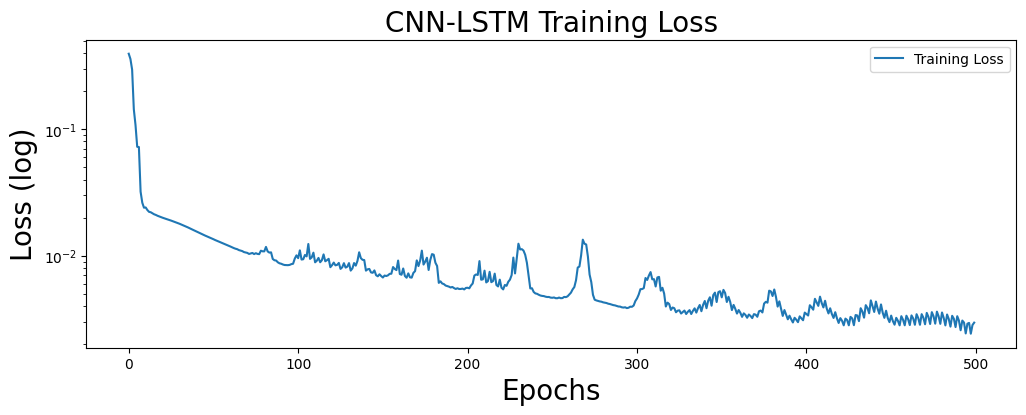

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(history.history['loss'], label='Training Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.yscale('log')
plt.title('CNN-LSTM Training Loss', fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (log)',fontsize=20)
plt.legend()
plt.show()

In [ ]:
test_predictions = best_model.predict(X_test).flatten()

2/2 [==============================] - 0s 16ms/step


In [ ]:
test_results = pd.DataFrame(data={'Train Predictions': test_predictions,
                                  'Actual':y_test.flatten()})

In [ ]:
test_predictions = best_model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Train Predictions': test_predictions,
                                  'Actual':y_test.flatten()})
test_results.head()

2/2 [==============================] - 0s 0s/step


,Train Predictions,Actual
0,0.705843,0.866477
1,0.754727,0.849432
2,0.782232,0.832386
3,0.808459,0.815341
4,0.826447,0.724432


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
mae = mean_absolute_error(y_test, test_predictions)
mse = mean_squared_error(y_test, test_predictions)
mape = mean_absolute_percentage_error(y_test, test_predictions)
print('Test mae: %.5f' % mae)
print('Test mse: %.5f' % mse)
print('Test mape: %.5f' % mape)

Test mae: 0.09822
Test mse: 0.01462
Test mape: 0.13544


In [ ]:
# 定義 `test_df`
test_df = pd.DataFrame(data={'Actual': y_test.flatten(), 'Predicted': test_predictions})

In [ ]:
# 確認 `time_step` 是多少，這裡假設為 n_past
time_step = n_past

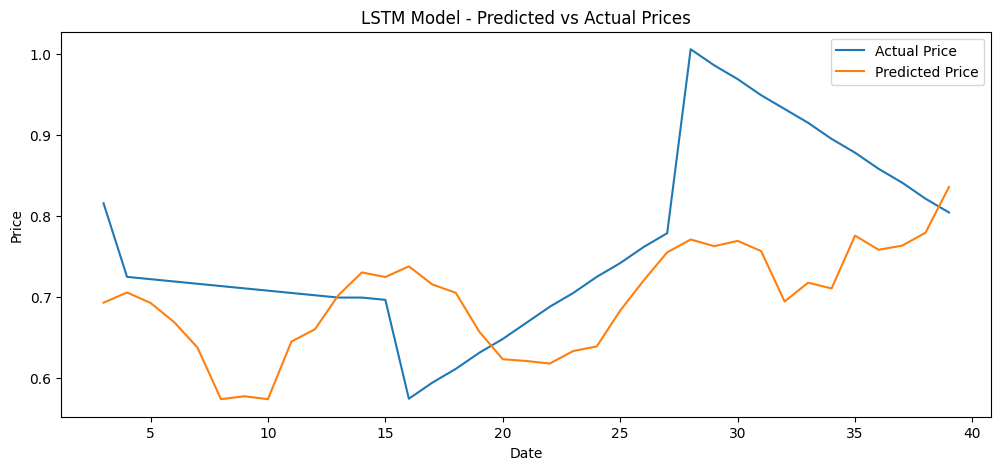

In [ ]:
# 繪製預測結果與實際結果的折線圖
plt.figure(figsize=(12, 5))
plt.plot(test_df.index[time_step:], test_df['Actual'][time_step:], label='Actual Price')
plt.plot(test_df.index[time_step:], test_df['Predicted'][time_step:], label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('LSTM Model - Predicted vs Actual Prices')
plt.legend()
plt.show()


In [ ]:
# 確定要生成散佈圖的特徵
features = ['gdp', 'elec', 'renewanbleenergy', 'population', 'cpi', 'ipi', 'eport_amt', 'commericalvehicle', 'vehiclecount']





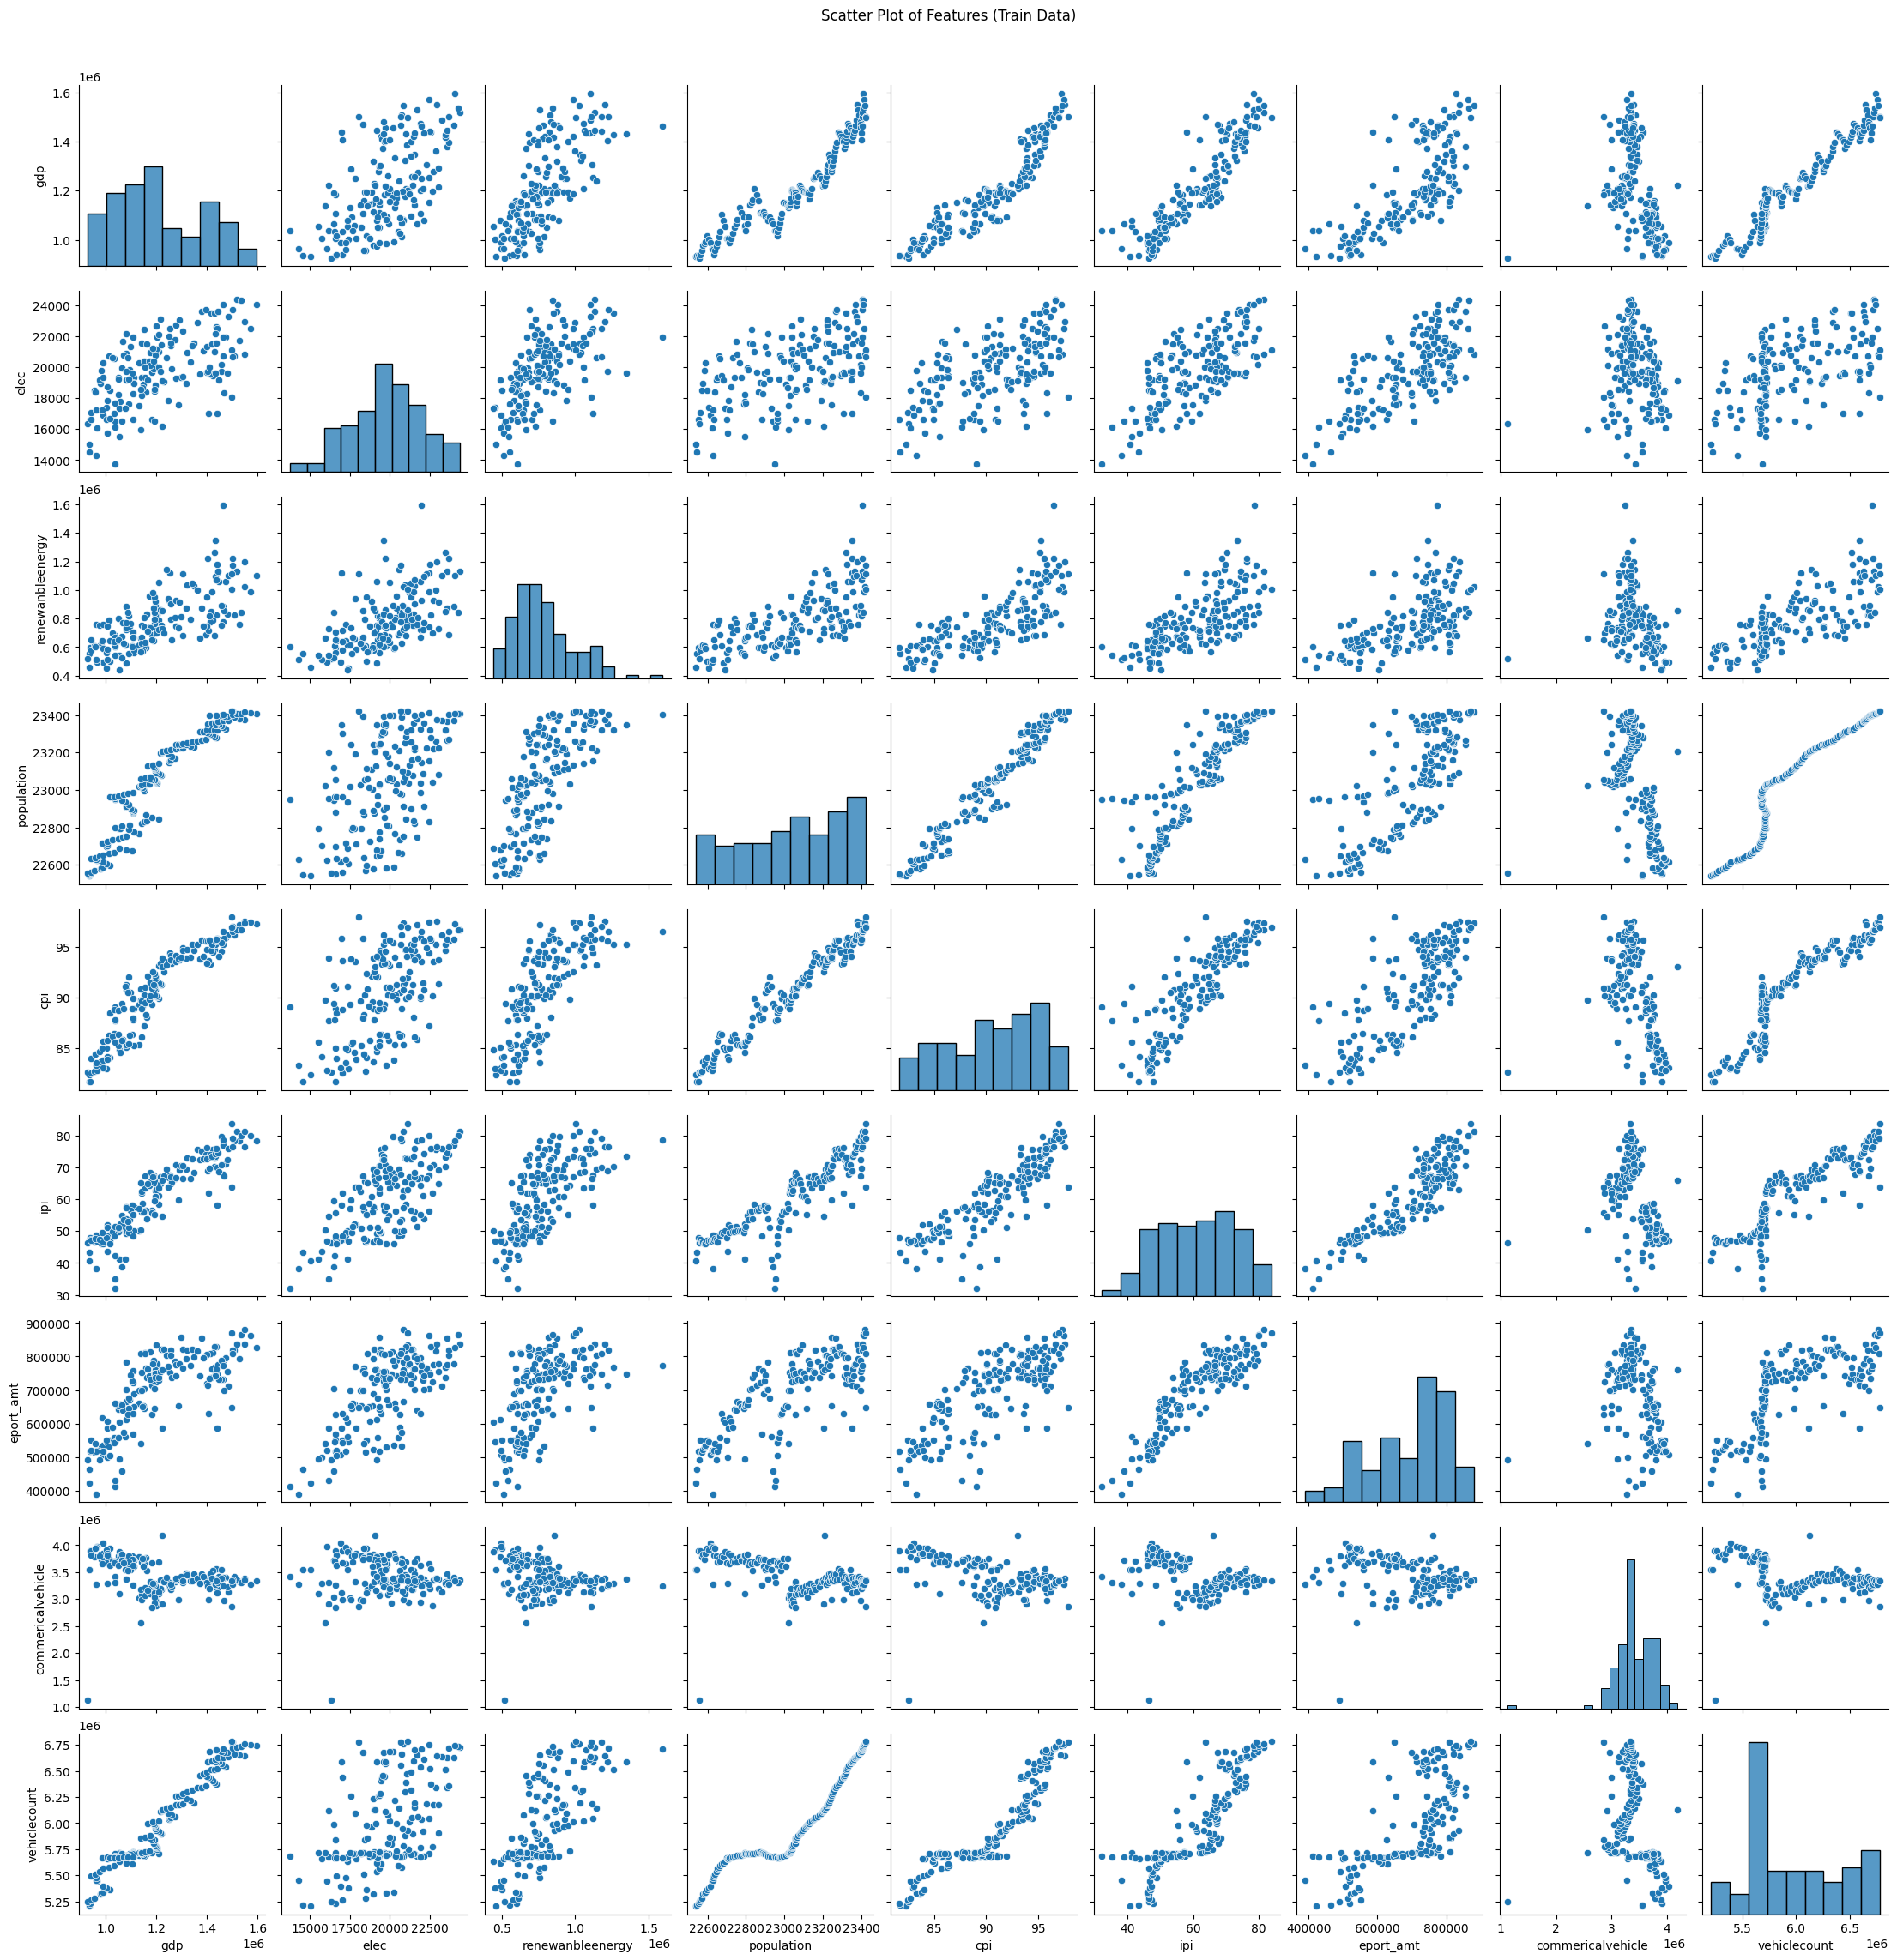

In [ ]:
# 生成散佈圖
sns.pairplot(df_train[features])
plt.suptitle('Scatter Plot of Features (Train Data)', y=1.02)
plt.show()

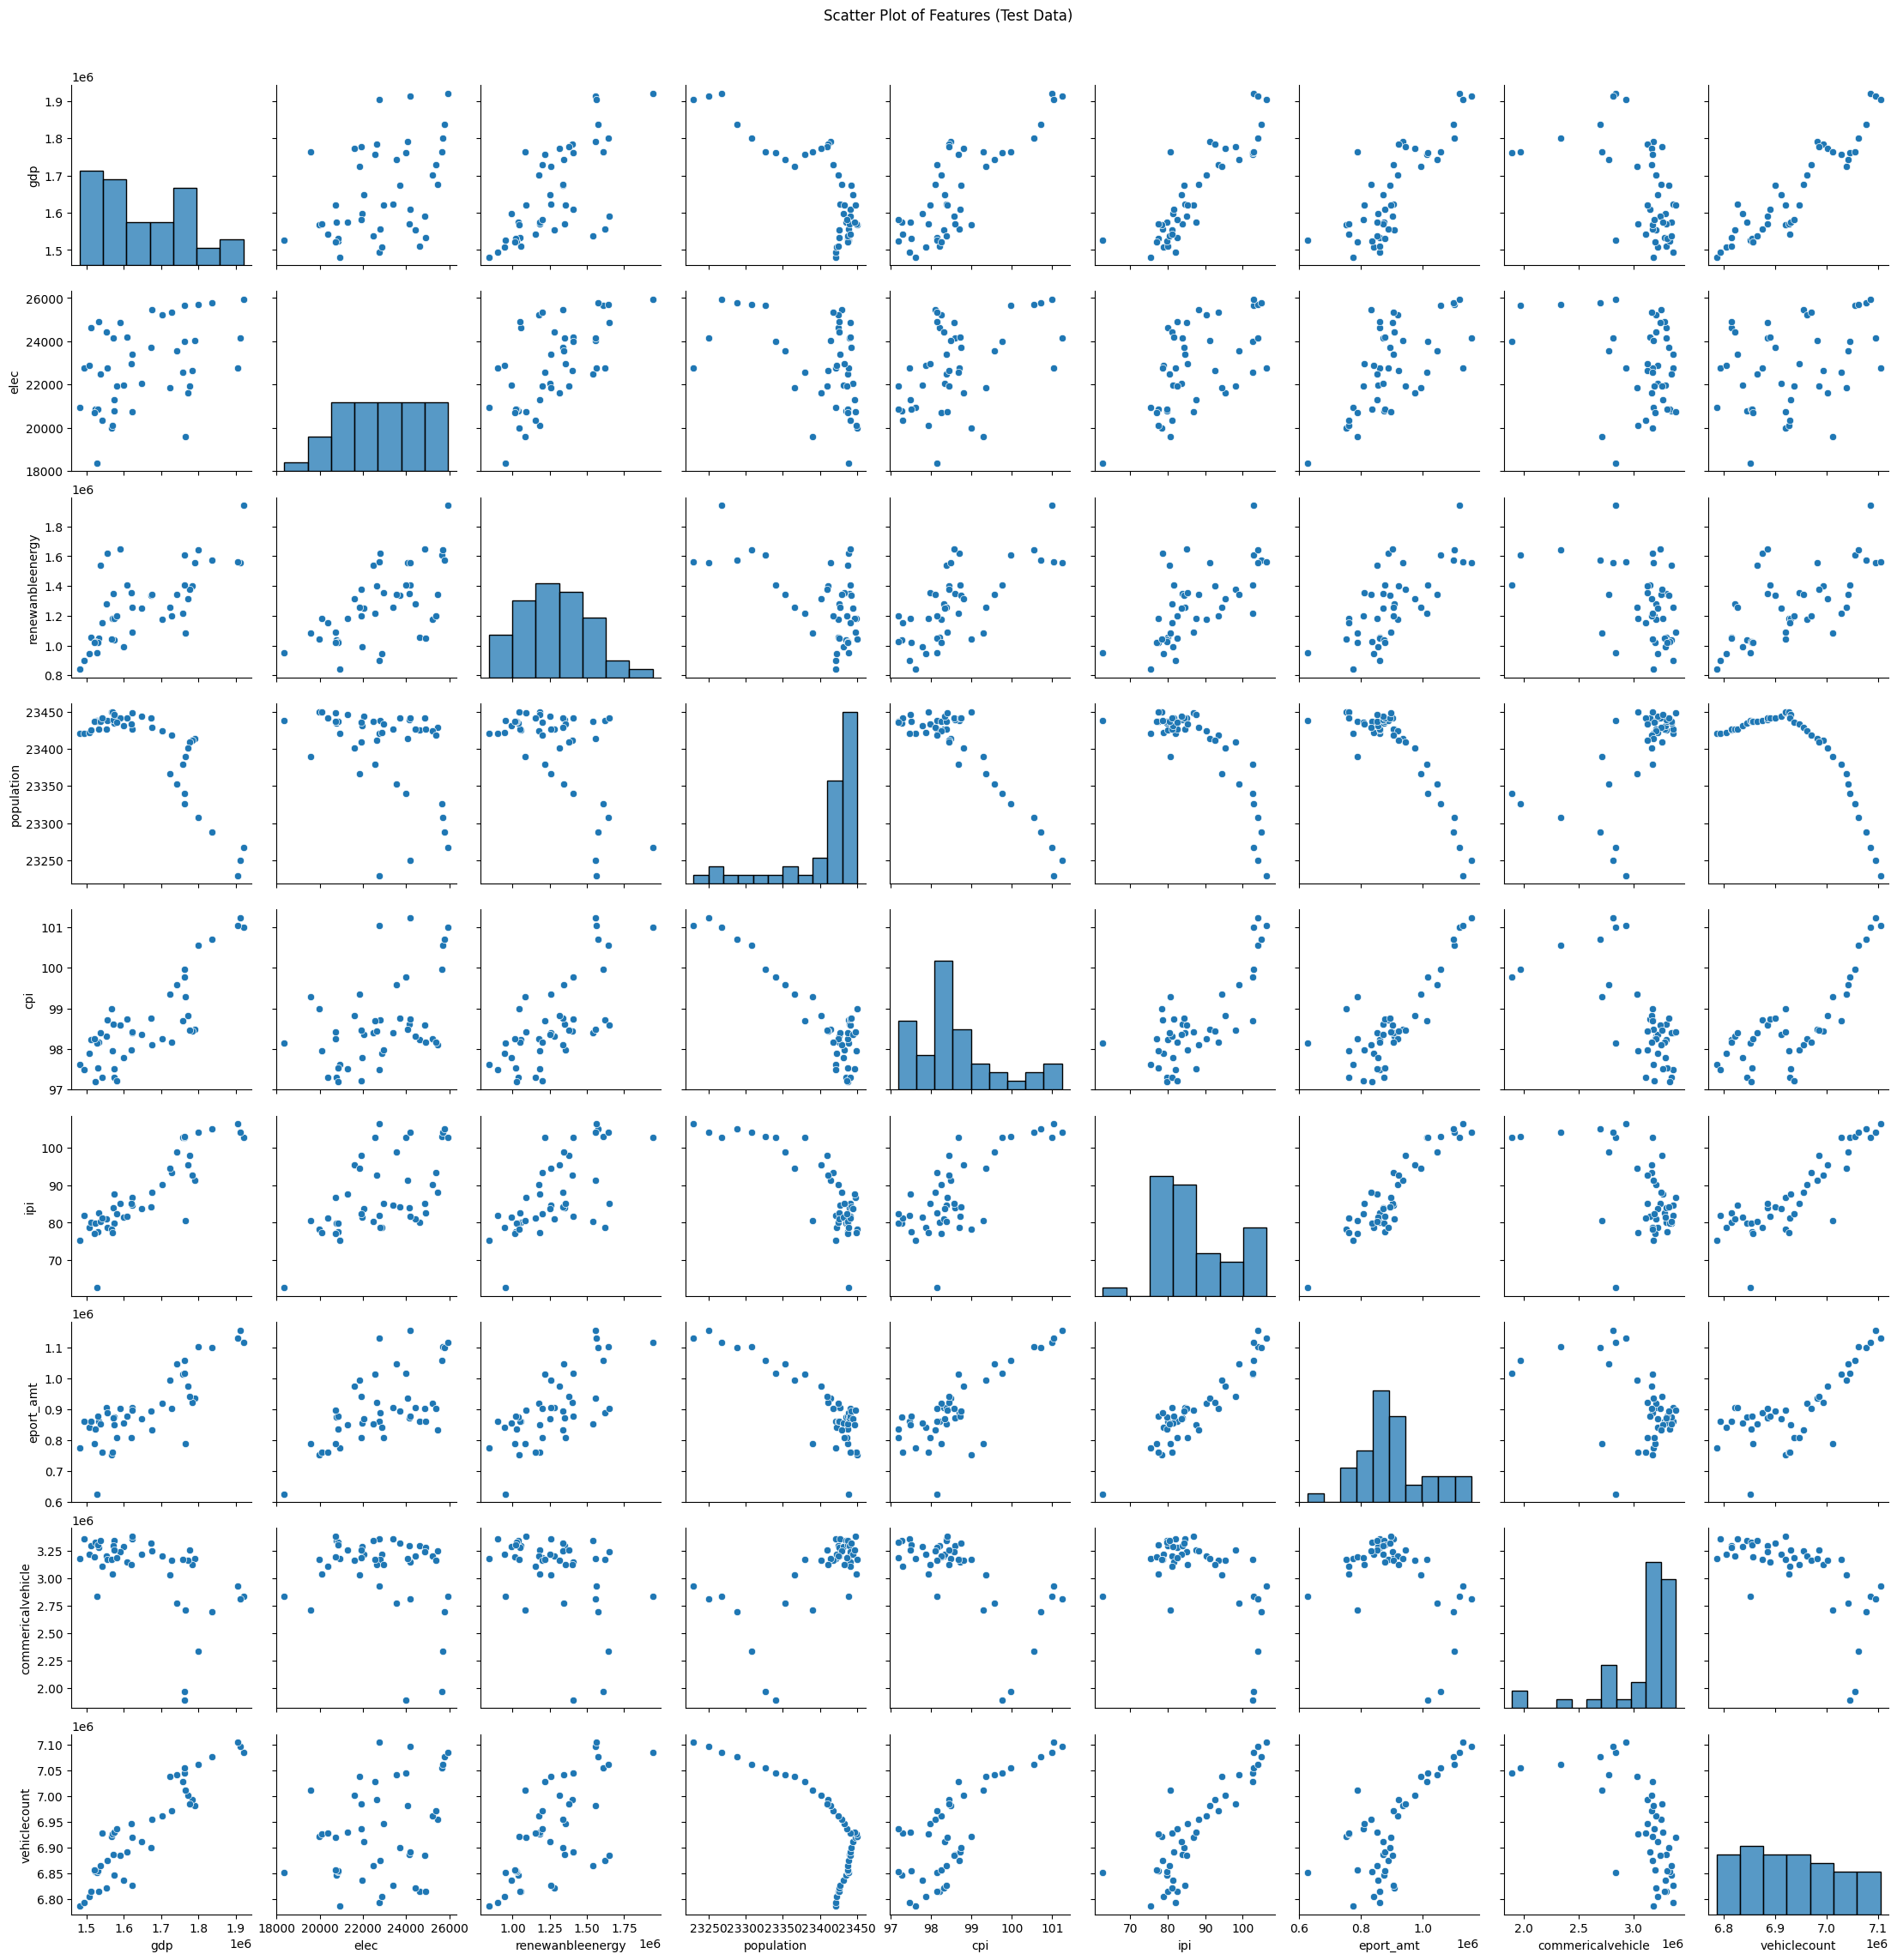

In [ ]:
sns.pairplot(df_test[features])
plt.suptitle('Scatter Plot of Features (Test Data)', y=1.02)
plt.show()